# Packages

In [2]:
import pandas as pd
import numpy as np
import math
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

# Functions

In [345]:
def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

In [347]:
def uniquize(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

# Data Preprocessing

In [203]:
data = pd.read_csv('KaggleWinningSolutions.csv')

In [205]:
for i, value in enumerate(data['Internal Links']):
    if isinstance(value, float) and np.isnan(value):
        continue
    else:
        data['Internal Links'][i] = value.strip('[]').replace('\'', '').split(', ')

## Competition Tags

In [ ]:
for i, value in enumerate(data['Competition Tags']):
    if isinstance(value, float) and np.isnan(value):
        continue
    else:
        data['Competition Tags'][i] = value.split(', ')

## Identify Internal Links

In [244]:
all_kaggle_counters = []
all_github_counters = []
all_other_counters = []
all_internal_links_length = []
all_checkers = []
for value in data['Internal Links']:
    if isinstance(value, float) and np.isnan(value):
        all_kaggle_counters.append(0)
        all_github_counters.append(0)
        all_other_counters.append(0)
        all_internal_links_length.append(0)
        all_checkers.append(False)
        continue
    else:
        kaggle_counter = 0
        github_counter = 0
        other_counter = 0
        checker = False
        list_length = len(value)
        for link in value:
            if 'kaggle' in link:
                kaggle_counter += 1
                continue
            elif 'github' in link:
                github_counter += 1
                continue
            else:
                other_counter += 1
                continue

        if kaggle_counter == list_length:
            checker = True
        else:
            checker = False
            
        all_kaggle_counters.append(kaggle_counter)
        all_github_counters.append(github_counter)
        all_other_counters.append(other_counter)
        all_internal_links_length.append(list_length)
        all_checkers.append(checker)

In [246]:
data['Internal Links Count'] = all_internal_links_length
data['Kaggle Links Count'] = all_kaggle_counters
data['Github Links Count'] = all_github_counters
data['Other Links Count'] = all_other_counters
data['All Kaggle Internal Links'] = all_checkers

# Data Exploration

## Visualizations of Competition Tags

In [412]:
categories = flatten(data['Competition Tags'].values)
unique_categories = set(categories)
category_counts = Counter(categories)
category_counts_dict = dict(category_counts)
# Manually remove the category with value NaN
cleaned_category_counts_dict = {k: v for k, v in category_counts_dict.items() if not (isinstance(k, float) and math.isnan(k))}

# Data for plotting
labels = list(cleaned_category_counts_dict.keys())
counts = list(cleaned_category_counts_dict.values())

### Word Cloud

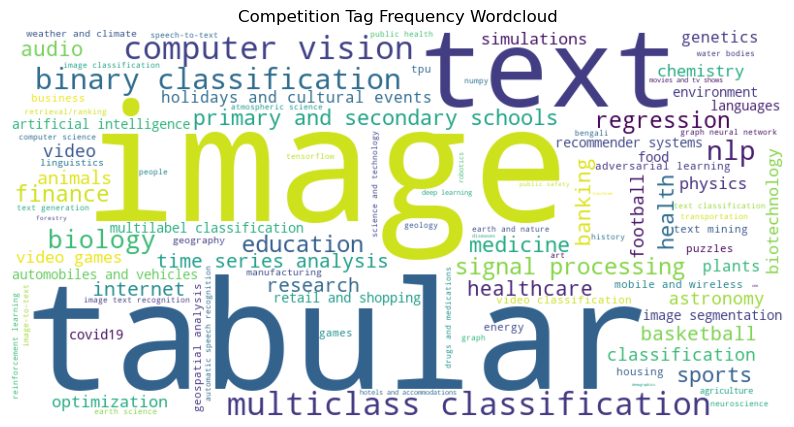

In [432]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(cleaned_category_counts_dict)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Competition Tag Frequency Wordcloud')
plt.show()

### Bar Graph

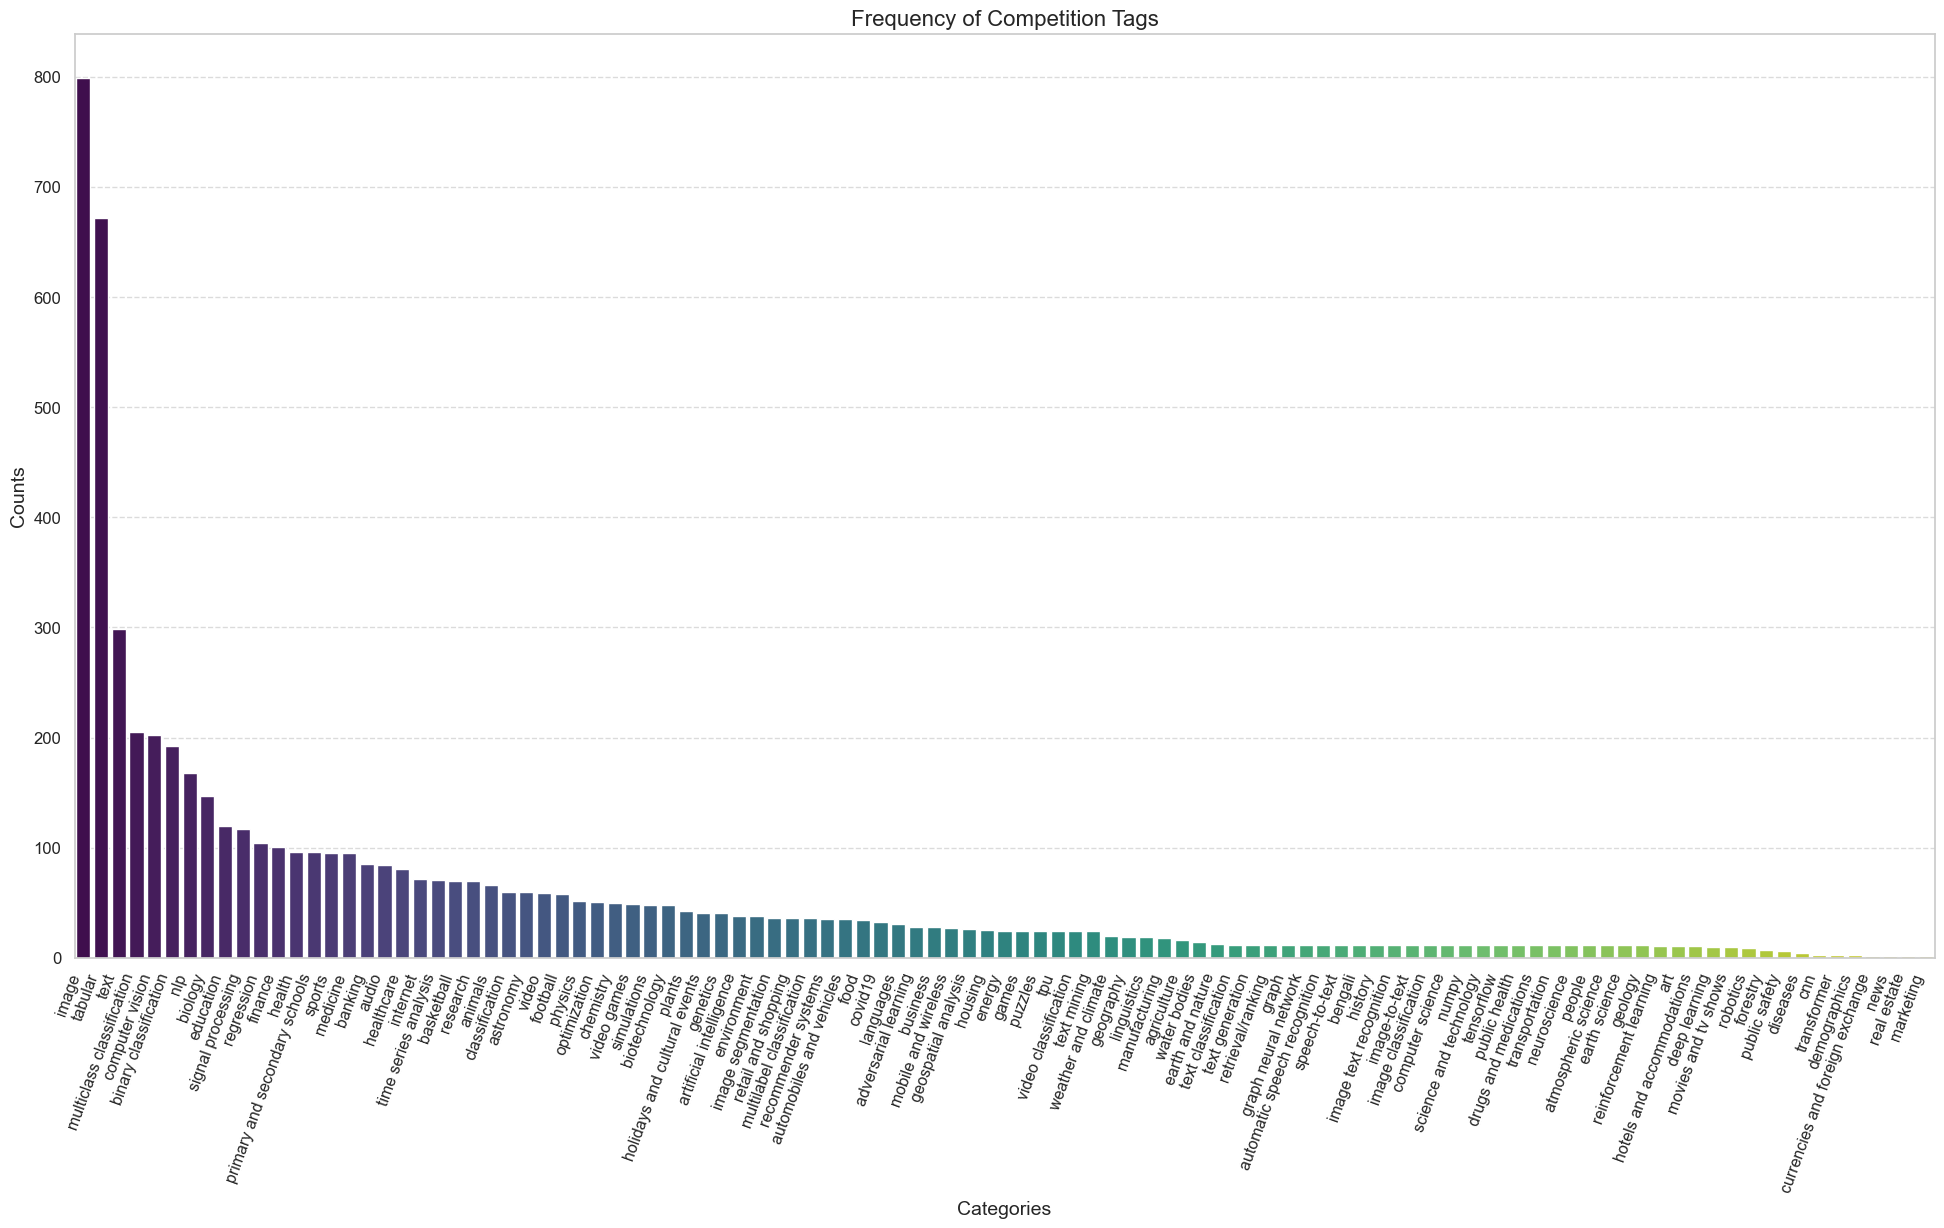

In [550]:
sorted_categories = sorted(cleaned_category_counts_dict.items(), key=lambda x: x[1], reverse=True)
labels, counts = zip(*sorted_categories)

# Set font sizes globally
plt.rcParams.update({
    'axes.labelsize': 14, 
    'xtick.labelsize': 11.5, 
    'ytick.labelsize': 12, 
    'axes.titlesize': 16
})

# Create a vertical bar plot using Seaborn
plt.figure(figsize=(24, 12))  # Increase figure size
sns.barplot(x=labels, y=counts, palette='viridis')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Frequency of Competition Tags')
plt.xticks(rotation=70, ha='right')  # Rotate labels and align them to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [558]:
cleaned_category_counts_dict

{'computer vision': 202,
 'image': 799,
 'basketball': 70,
 'sports': 95,
 'artificial intelligence': 38,
 'nlp': 168,
 'plants': 43,
 'cnn': 3,
 'regression': 104,
 'transformer': 3,
 'banking': 85,
 'tabular': 672,
 'education': 120,
 'classification': 60,
 'text classification': 12,
 'research': 70,
 'healthcare': 81,
 'signal processing': 117,
 'optimization': 51,
 'holidays and cultural events': 41,
 'health': 96,
 'image segmentation': 36,
 'energy': 24,
 'time series analysis': 71,
 'binary classification': 192,
 'primary and secondary schools': 96,
 'text generation': 12,
 'games': 24,
 'puzzles': 24,
 'adversarial learning': 28,
 'video games': 49,
 'simulations': 48,
 'finance': 101,
 'genetics': 41,
 'biotechnology': 48,
 'deep learning': 10,
 'biology': 147,
 'chemistry': 50,
 'multiclass classification': 205,
 'tpu': 24,
 'retrieval/ranking': 12,
 'graph': 12,
 'graph neural network': 12,
 'audio': 84,
 'automatic speech recognition': 12,
 'speech-to-text': 12,
 'bengali':

## Visualizations of Solution Internal Links

### Solution Internal Links Distribution

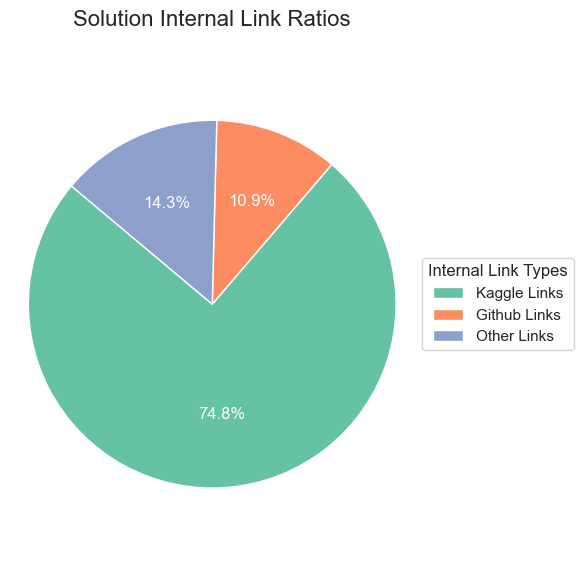

In [548]:
# Sum the counts for each link type
total_kaggle_links = data["Kaggle Links Count"].sum()
total_github_links = data["Github Links Count"].sum()
total_other_links = data["Other Links Count"].sum()

# Create a dictionary with these totals
link_counts_dict = {
    "Kaggle Links": total_kaggle_links,
    "Github Links": total_github_links,
    "Other Links": total_other_links
}

# Data for pie chart
labels_counter = list(link_counts_dict.keys())
counts_counter = list(link_counts_dict.values())

# Create a pie chart with Seaborn styling
plt.figure(figsize=(6, 6))

# Use a palette with distinct colors
colors = sns.color_palette("Set2")

# Create the pie chart
wedges, texts, autotexts = plt.pie(counts_counter, autopct='%1.1f%%', startangle=140, colors=colors, textprops=dict(color="w"))

# Create a legend
plt.legend(wedges, labels_counter, title="Internal Link Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Solution Internal Link Ratios', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

### Ratio of Solutions Full of Kaggle Internal Links vs Not Full of Kaggle Internal Links

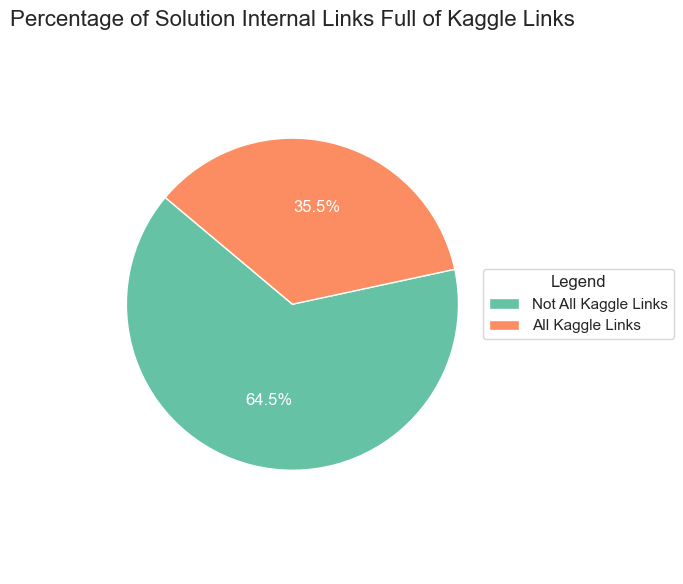

In [544]:
# Count the number of True and False values in "All Kaggle Internal Links"
kaggle_internal_counts = data["All Kaggle Internal Links"].value_counts()

labels_kaggle_internal = kaggle_internal_counts.index.map({True: 'All Kaggle Links', False: 'Not All Kaggle Links'})
counts_kaggle_internal = kaggle_internal_counts.values

plt.figure(figsize=(6, 6))

# Use a palette with distinct colors
colors = sns.color_palette("Set2", len(labels_kaggle_internal))

wedges, texts, autotexts = plt.pie(counts_kaggle_internal, autopct='%1.1f%%', startangle=140, colors=colors, textprops=dict(color="w"))

plt.legend(wedges, labels_kaggle_internal, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Percentage of Solution Internal Links Full of Kaggle Links', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

## Visualization of Image Inclusion Ratio

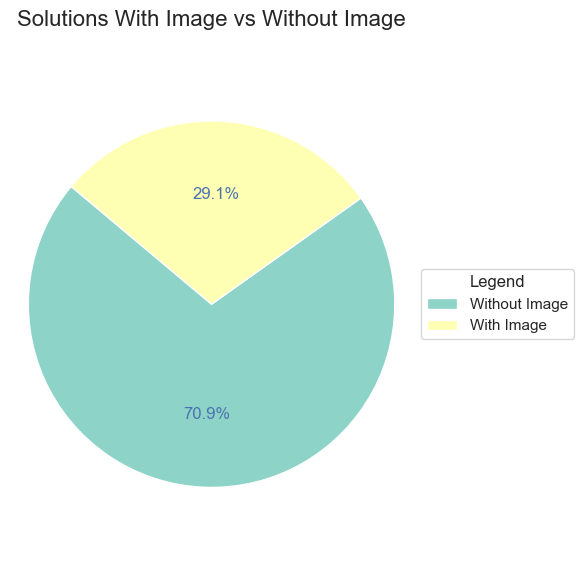

In [546]:
# Count the number of True and False values in "Contains Image"
contains_image_counts = data["Contains Image"].value_counts()

labels_images = contains_image_counts.index.map({True: 'With Image', False: 'Without Image'})
counts_images = contains_image_counts.values

plt.figure(figsize=(6, 6))

# Use a palette with distinct colors
colors = sns.color_palette("Set3", len(labels_images))

wedges, texts, autotexts = plt.pie(counts_images, autopct='%1.1f%%', startangle=140, colors=colors, textprops=dict(color="b"))

plt.legend(wedges, labels_images, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Solutions With Image vs Without Image', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()